In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

# Step 1: Load the dataset
dataset = fetch_ucirepo(id=320)
data_url = dataset['metadata']['data_url']

# Load the data from the URL
data = pd.read_csv(data_url)

# Extract variable names and data
variables = dataset['variables']
feature_names = variables['name'].tolist()
data.columns = feature_names

# Convert appropriate columns to numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='ignore')

# Identify the new target variable
target = 'G3'

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_12136\1919497967.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


In [3]:
# Step 2: View basic information about the dataset
print("Basic Information:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    obj

In [4]:
# Step 3: Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [5]:
# Step 4: Summarize numerical and categorical features
print("\nSummary Statistics for Numerical Features:")
print(data.describe())
print("\nSummary Statistics for Categorical Features:")
print(data.describe(include=[object]))


Summary Statistics for Numerical Features:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.28043

The summary statistics provide a detailed overview of the numerical features in the dataset. Key takeaways include:

Age: The students' ages range from 15 to 22, with a mean age of approximately 16.7 years.
Education Levels (Medu and Fedu): Both mother’s and father’s education levels are scored from 0 to 4, with means around 2.5 and 2.3, respectively. This indicates a moderate education level on average.
Study Time: The amount of time dedicated to study each week ranges from 1 to 4, with a mean of 1.9, indicating that most students study around 2 hours weekly.
Failures: The number of past class failures ranges from 0 to 3, with most students having no failures.
Family Relationship (famrel): Family relationship quality is generally high, with a mean score of 3.9 out of 5.
Alcohol Consumption (Dalc and Walc): Daily and weekend alcohol consumption are relatively low, with means of 1.5 and 2.3 out of 5, respectively.
Health: Health status ranges from 1 to 5, with a mean of 3.5, indicating a generally good health condition among students.
Absences: The number of school absences varies widely, with a mean of 3.7 days.
Grades (G1, G2, G3): The grades range from 0 to 20, with means around 11.4, 11.6, and 11.9, respectively, showing moderate academic performance.


Visualizing distributions of numerical features:


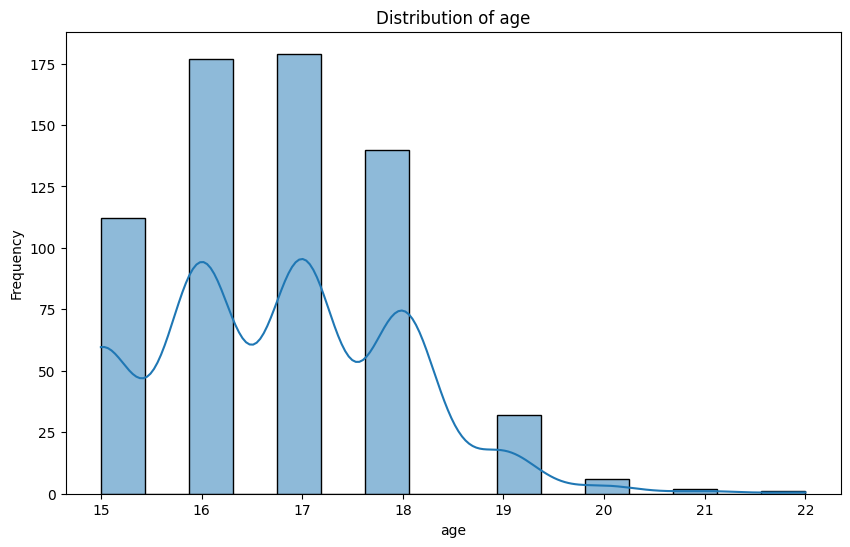

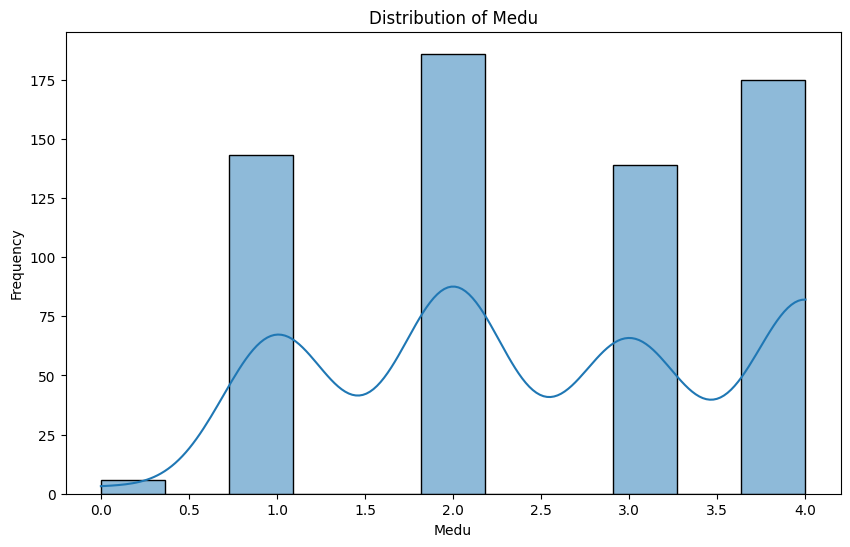

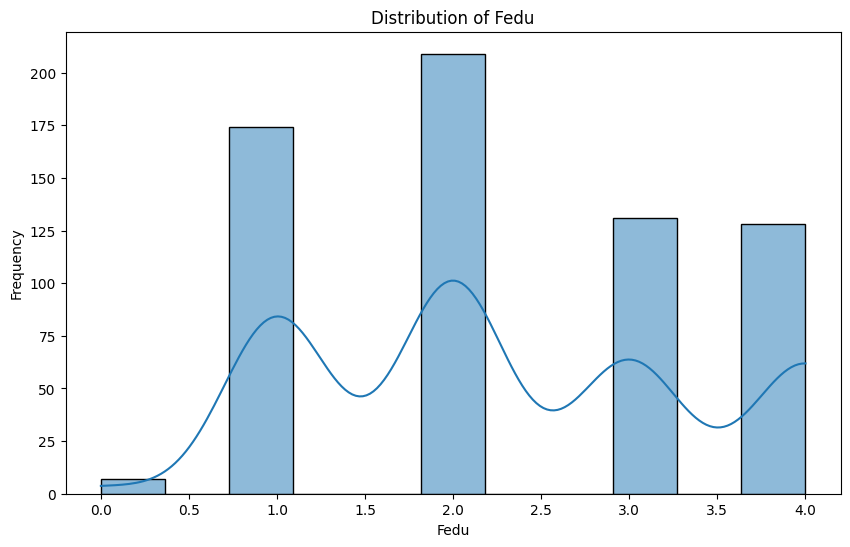

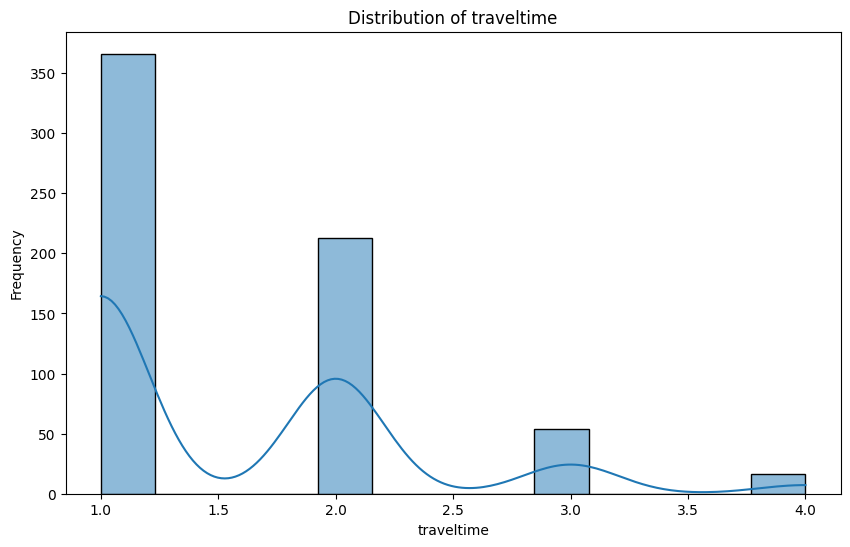

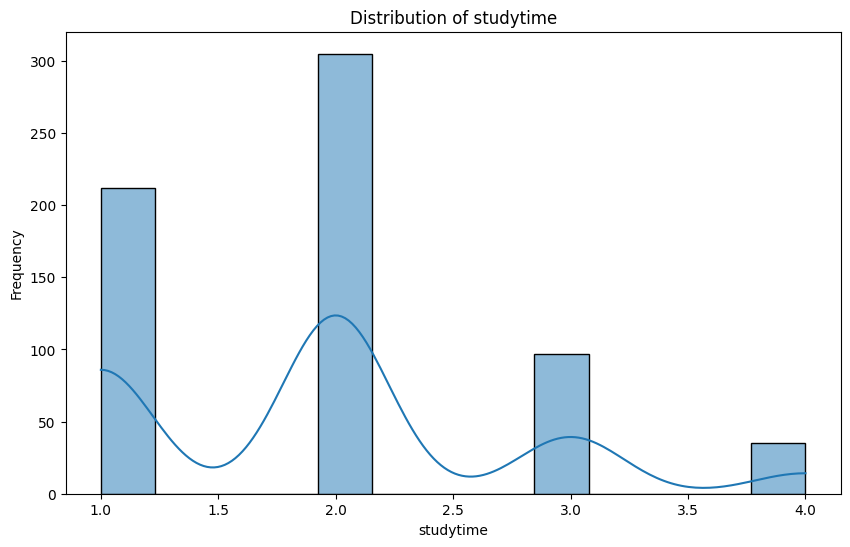

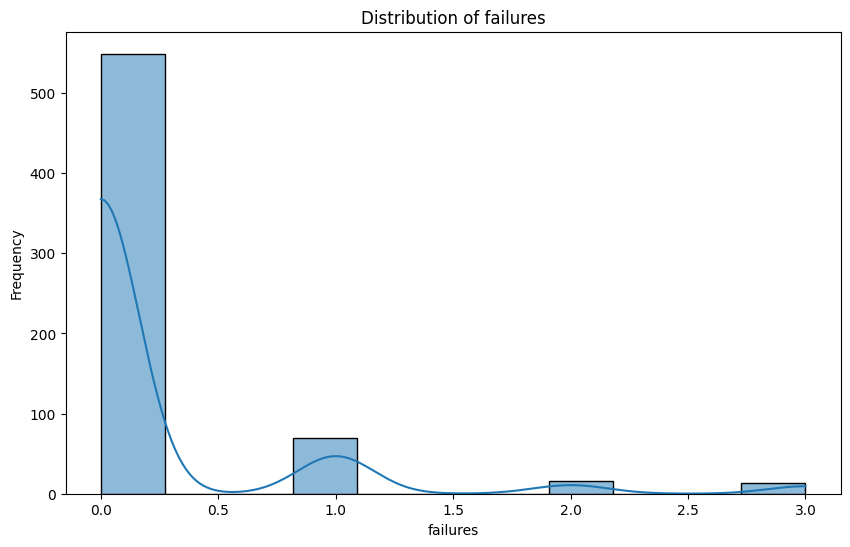

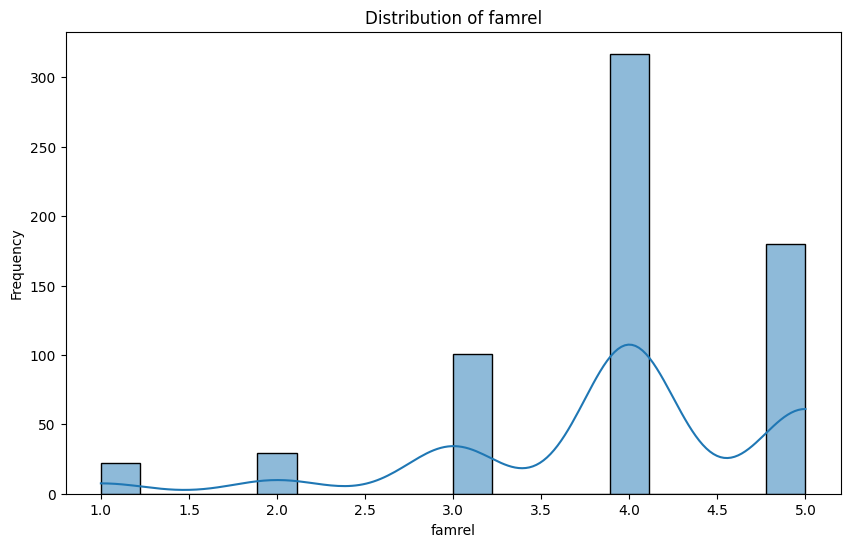

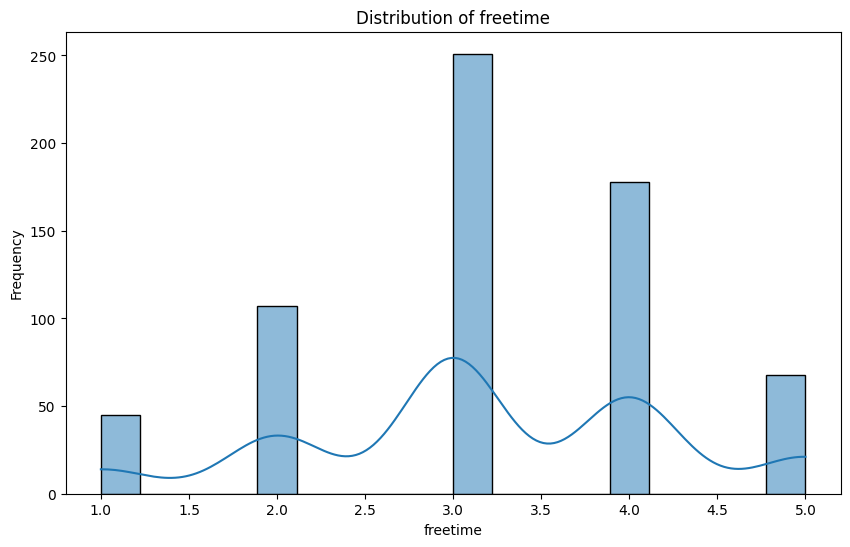

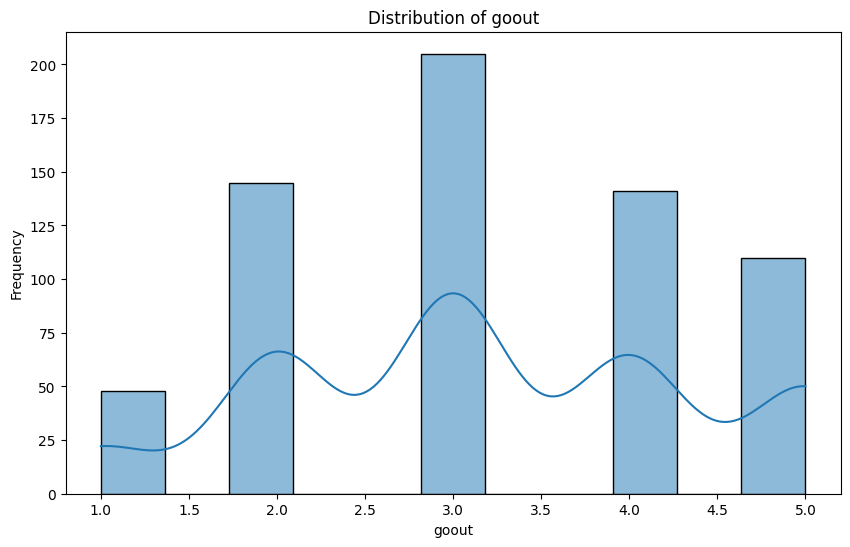

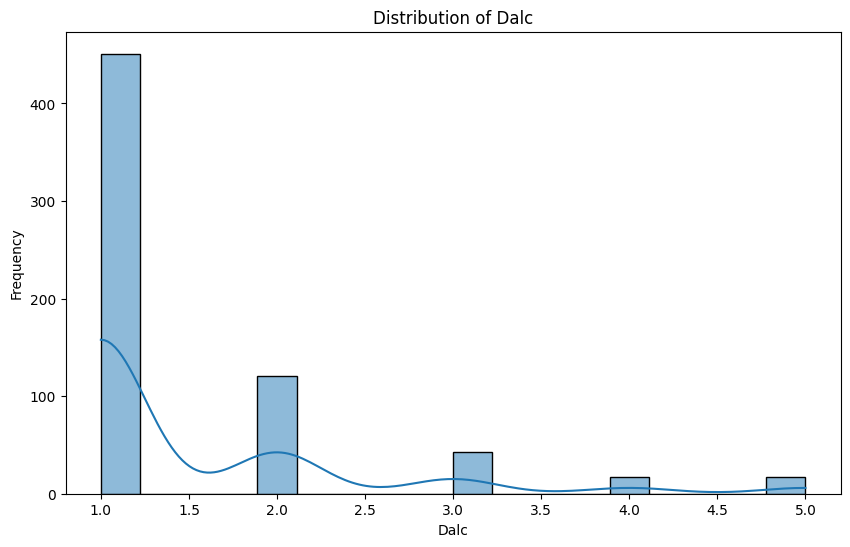

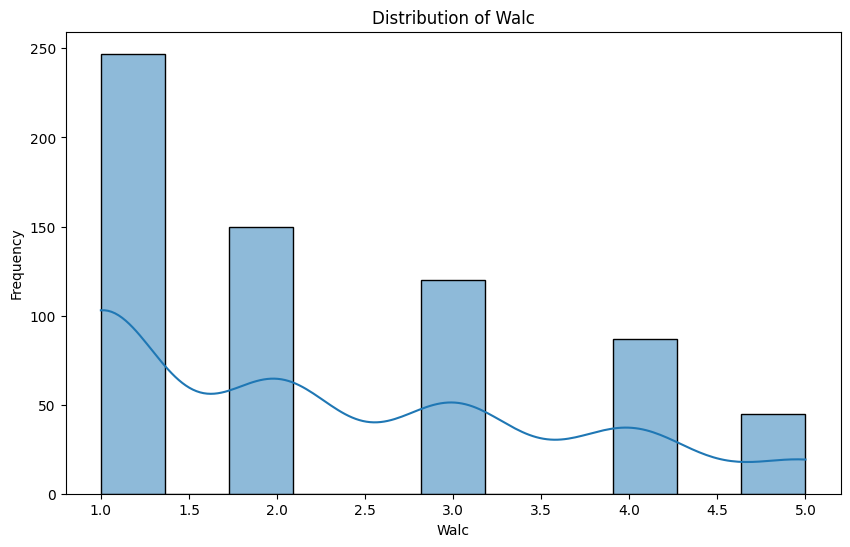

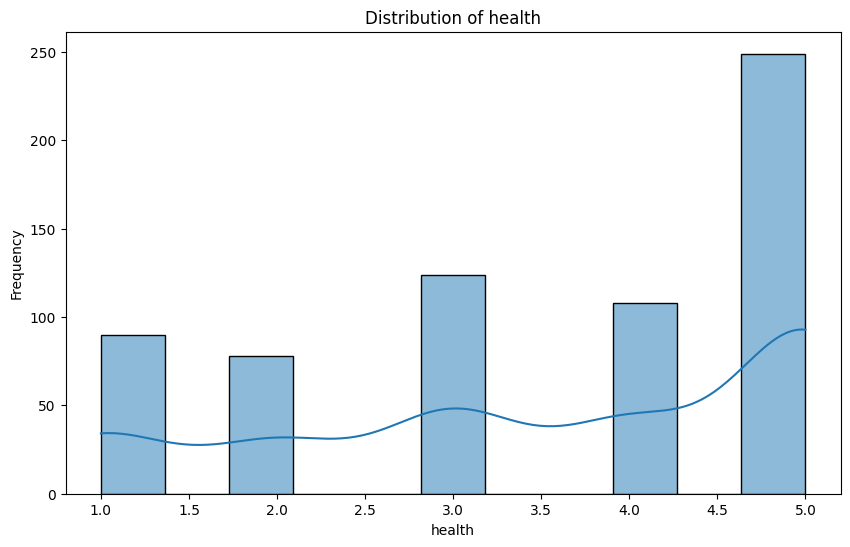

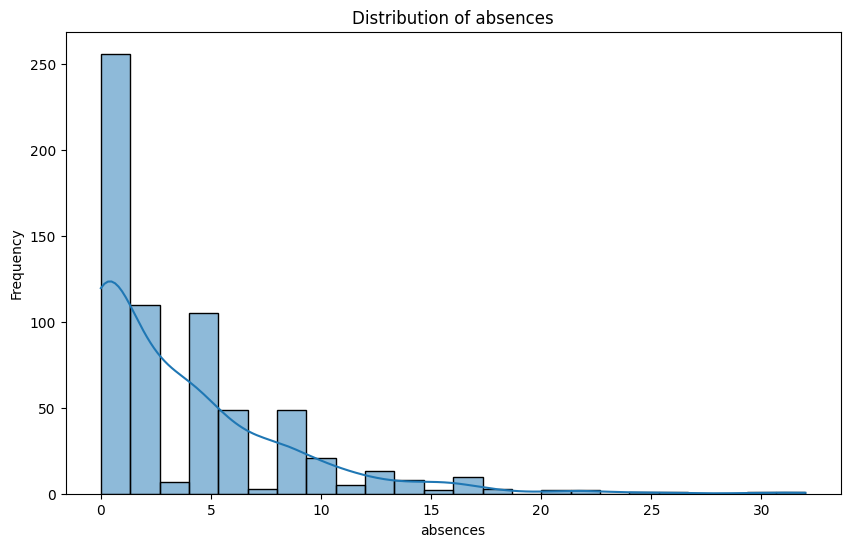

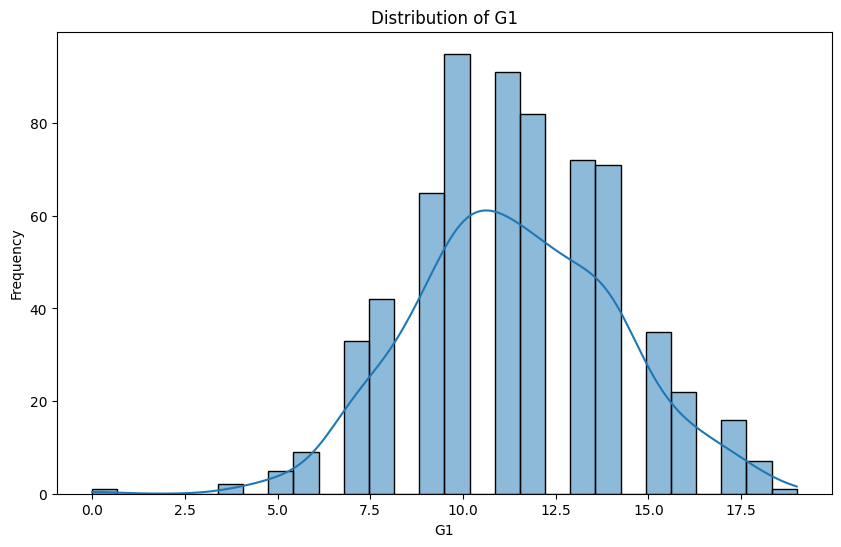

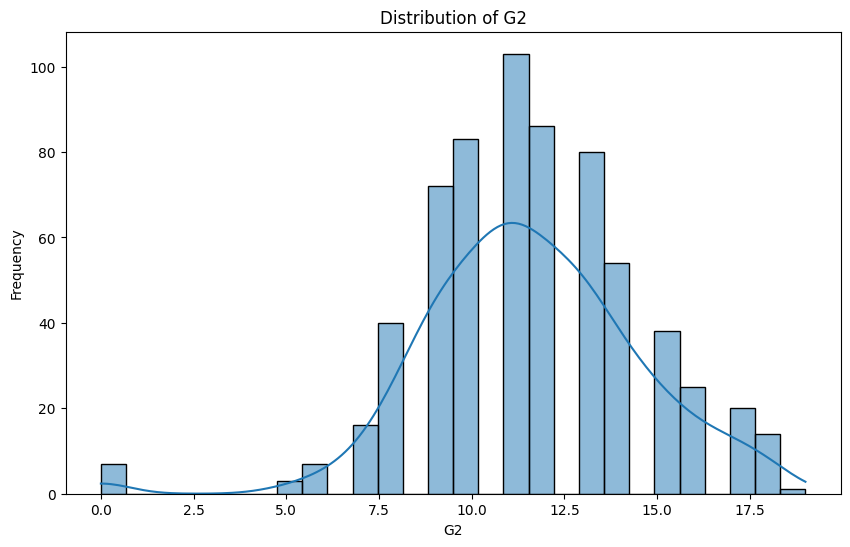

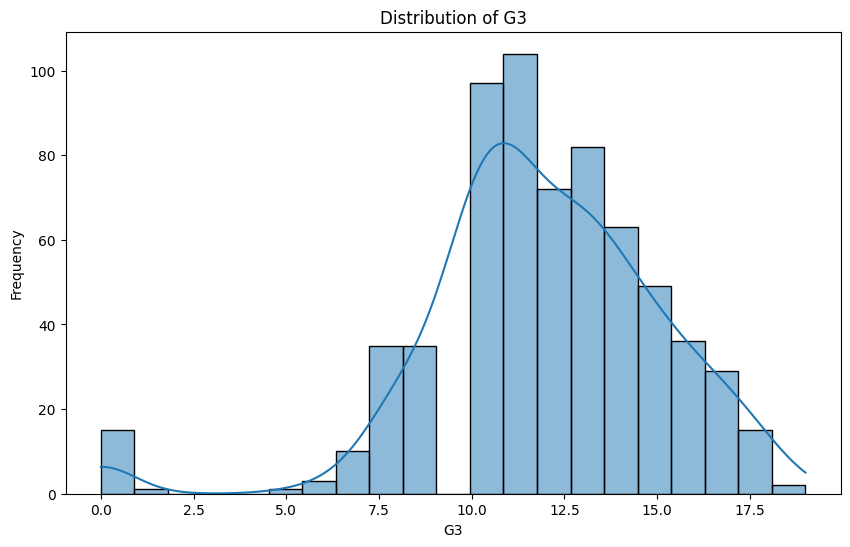

In [6]:
# Step 5: Visualize distributions of numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
print("\nVisualizing distributions of numerical features:")
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

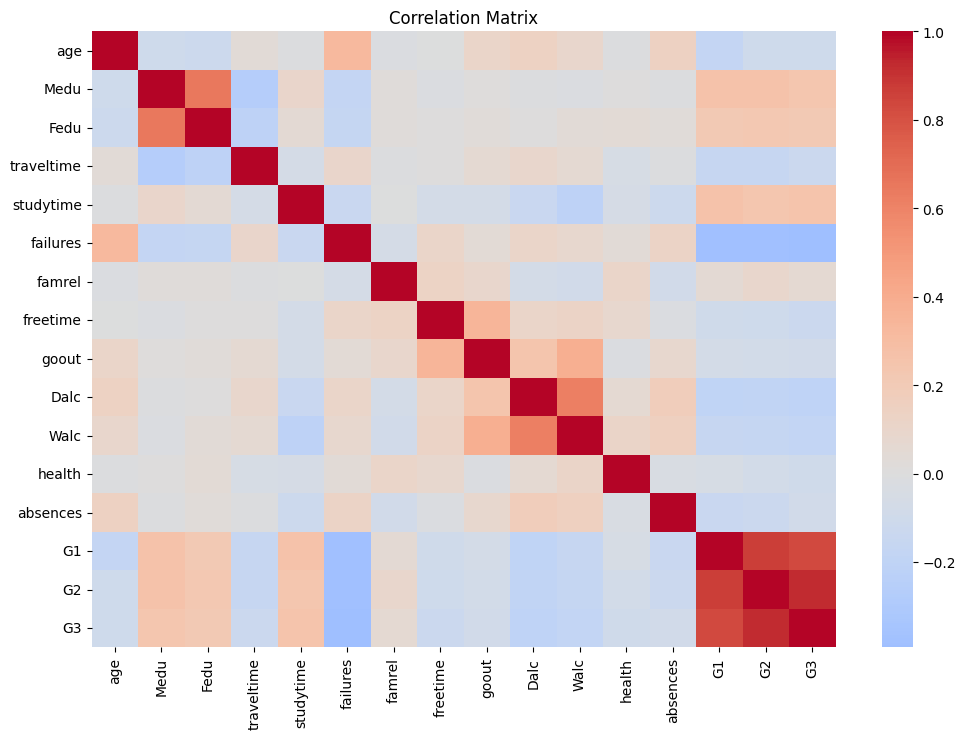

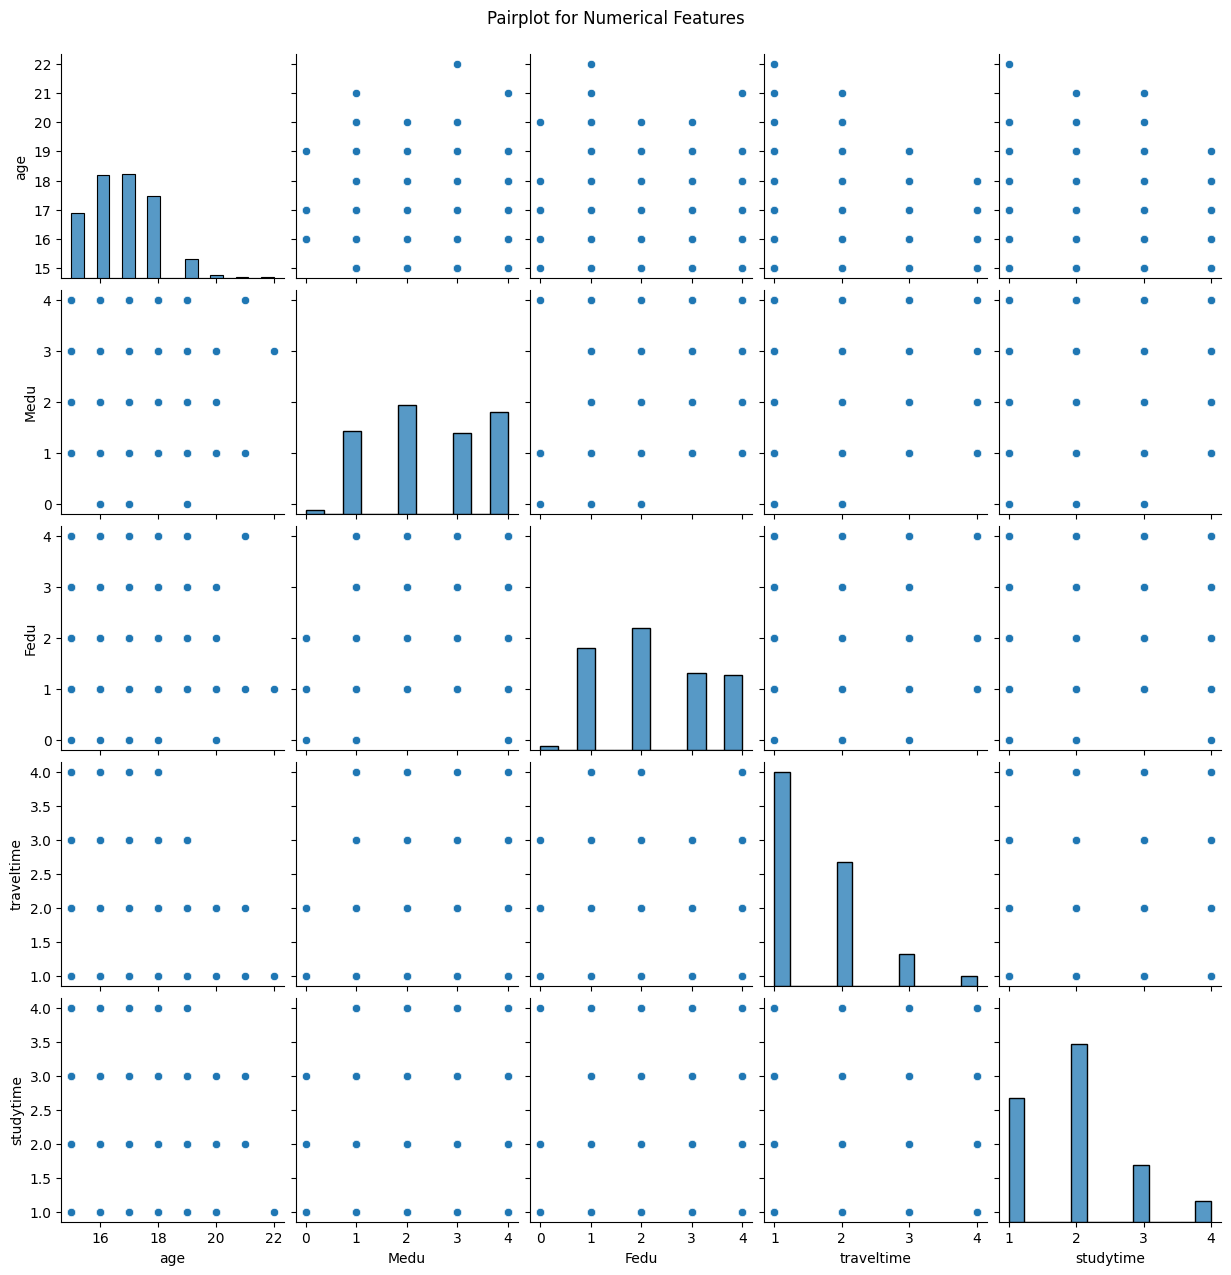

In [7]:
# Step 6: Explore relationships between features
corr_matrix = data[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Pairplot for a subset of numerical features
sample_numerical_features = numerical_features[:5]  # Take first 5 numerical features for simplicity
sns.pairplot(data[sample_numerical_features].dropna())
plt.suptitle('Pairplot for Numerical Features', y=1.02)
plt.show()

The correlation matrix provides insight into the relationships between numerical features. Significant observations include:

Strong Positive Correlations: Grades (G1, G2, G3) are strongly correlated with each other, indicating consistency in academic performance across different grading periods.
Parental Education: Both mother’s and father’s education levels show a moderate positive correlation with each other, suggesting that higher education levels are likely to be seen together within families.
Study Time and Failures: There is a negative correlation between study time and failures, indicating that more study time is associated with fewer failures.

The pairplot visualizes relationships between numerical features. Key insights include:

Distinct Clusters: The data points show distinct clusters for several features, highlighting the potential for meaningful groupings or patterns in the data.
Age and Education Levels: The relationship between age and education levels (Medu, Fedu) shows variability, with older students generally having higher parental education levels.


Distribution of target variable (G3):
G3
11    0.160247
10    0.149461
13    0.126348
12    0.110940
14    0.097072
15    0.075501
16    0.055470
9     0.053929
8     0.053929
17    0.044684
18    0.023112
0     0.023112
7     0.015408
6     0.004622
19    0.003082
1     0.001541
5     0.001541
Name: proportion, dtype: float64


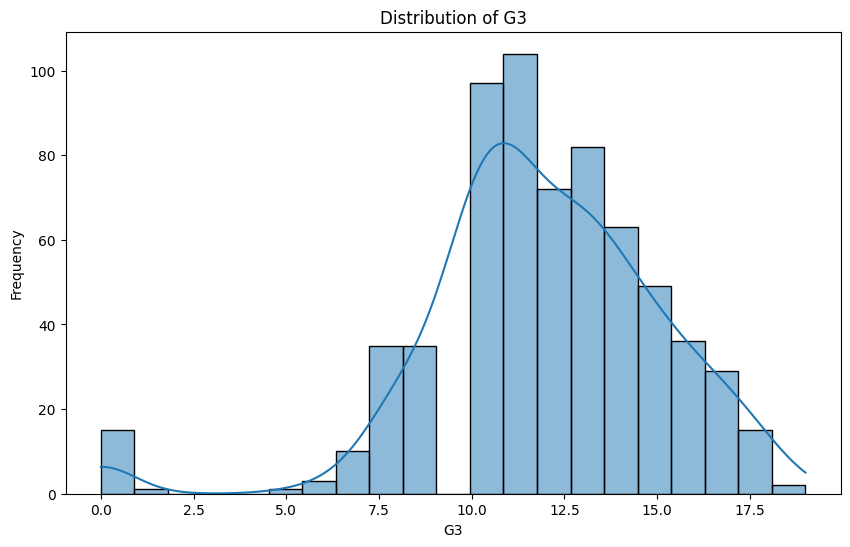

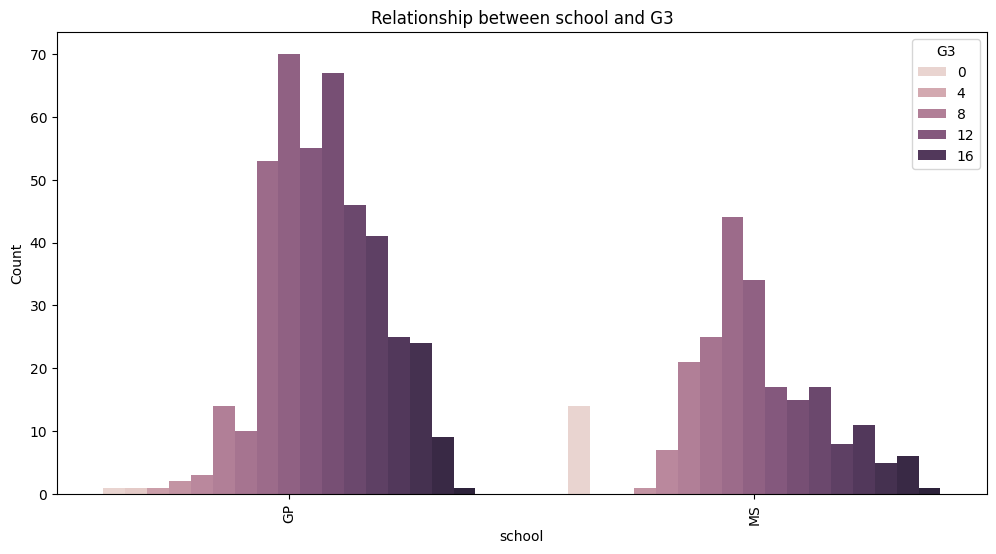

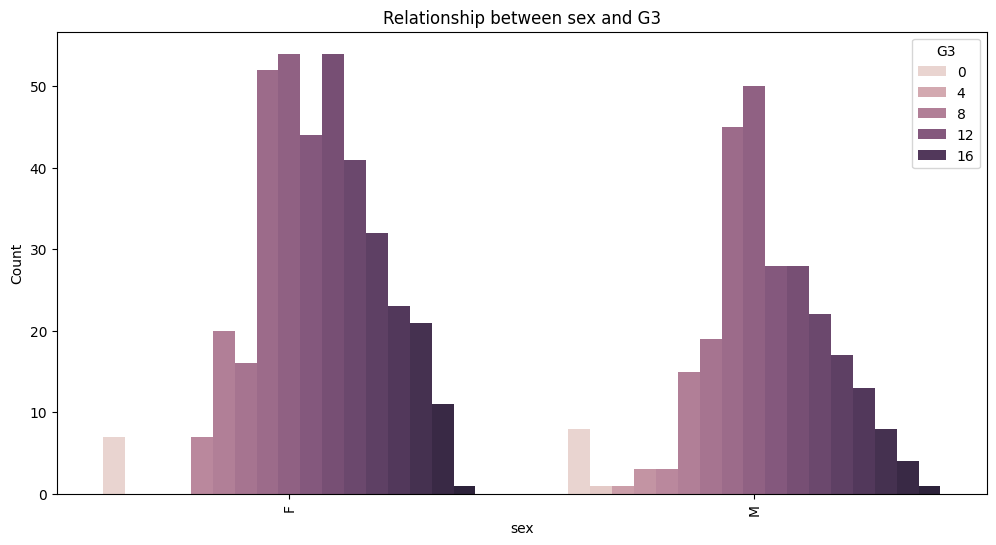

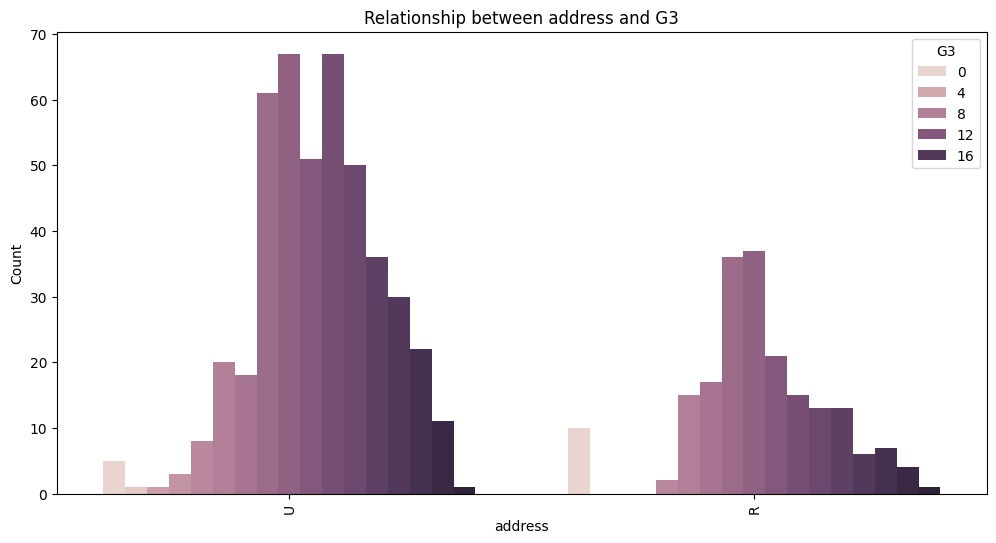

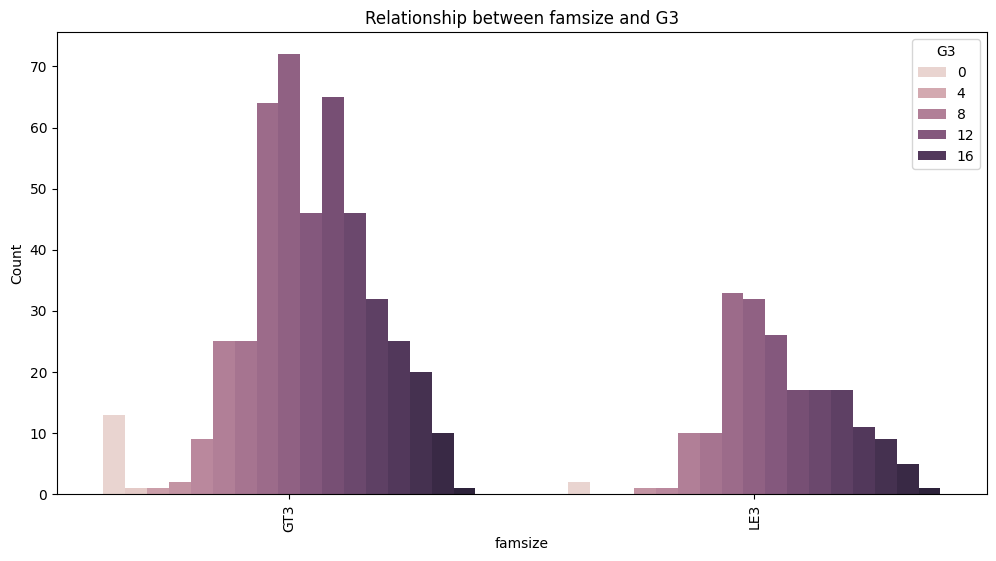

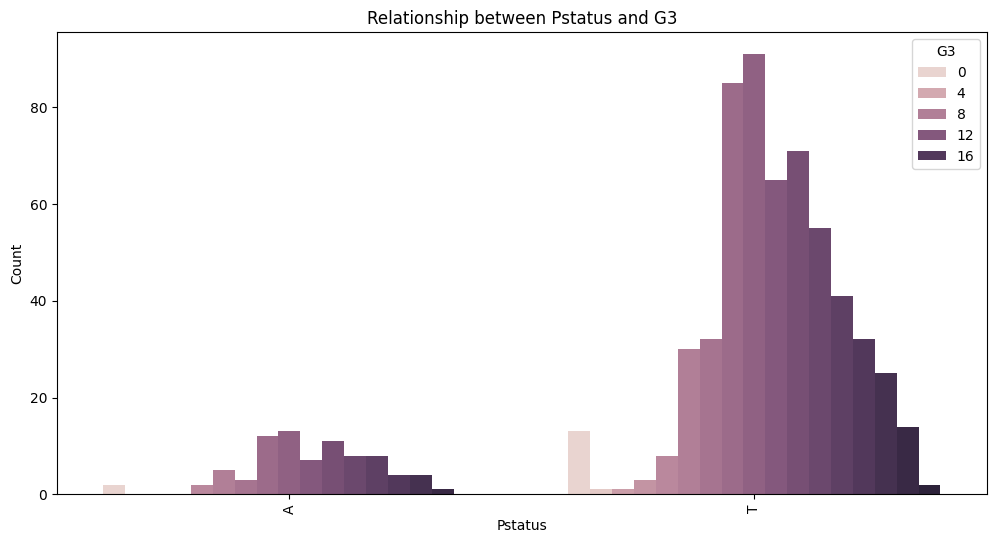

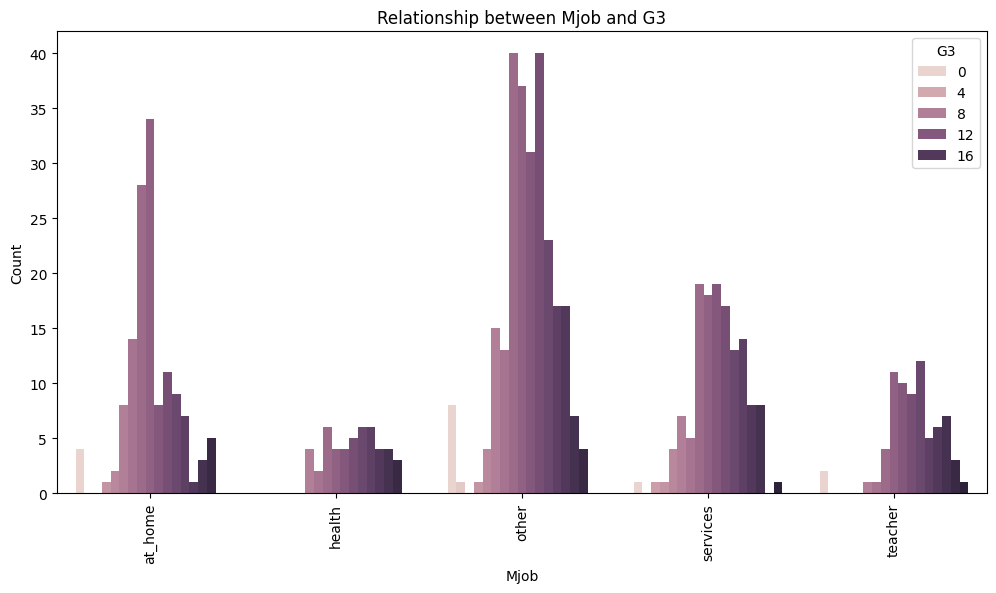

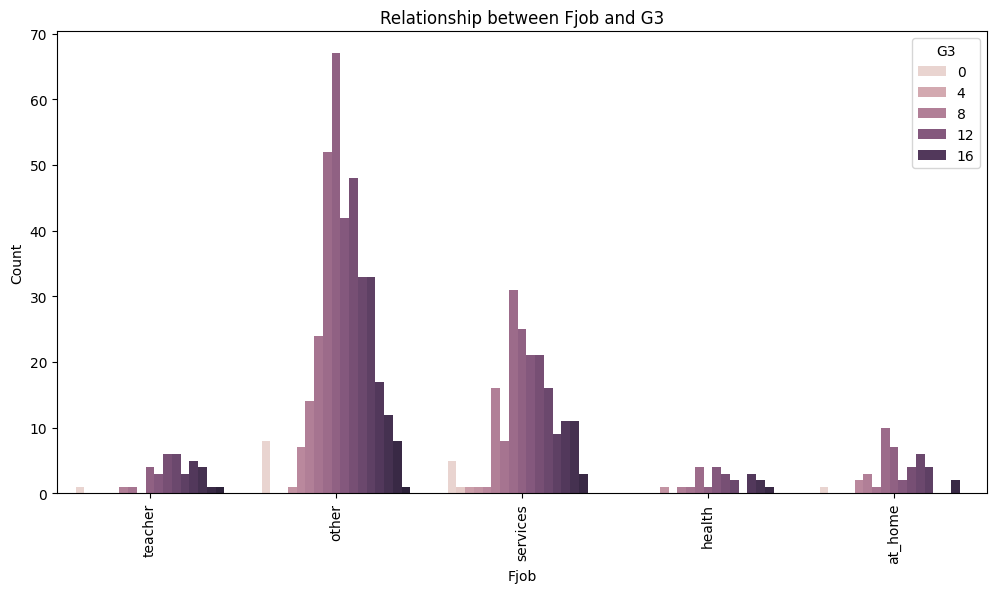

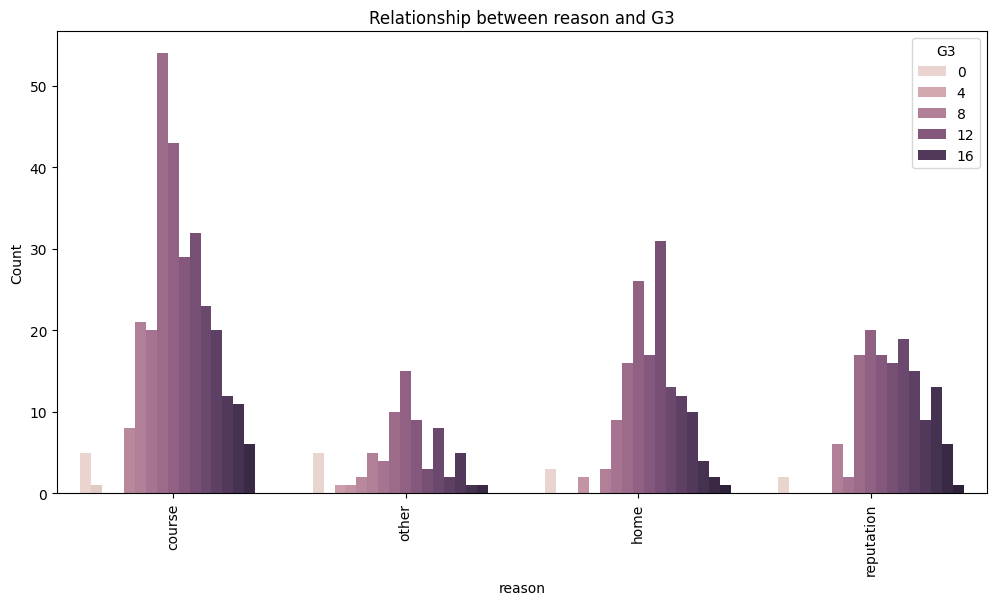

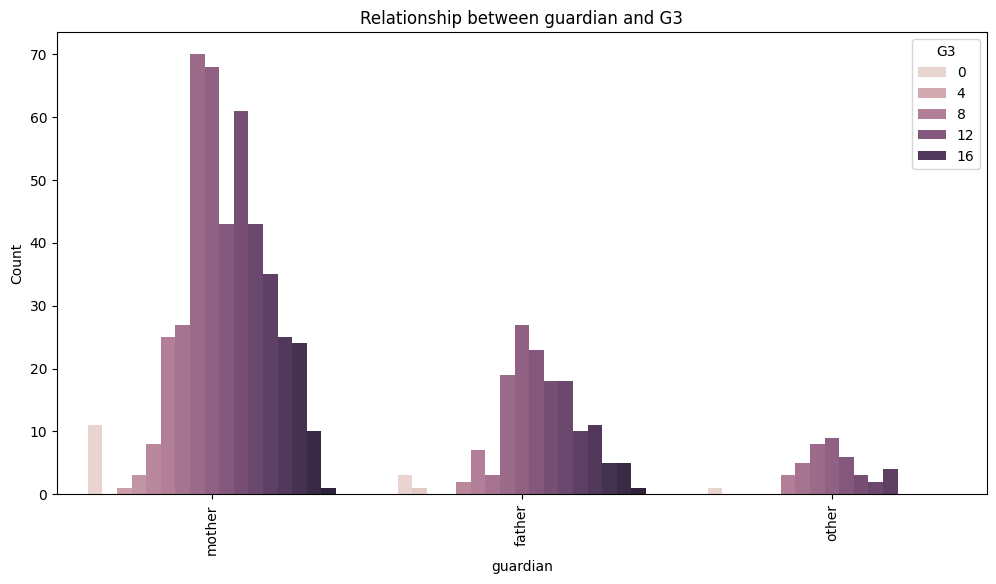

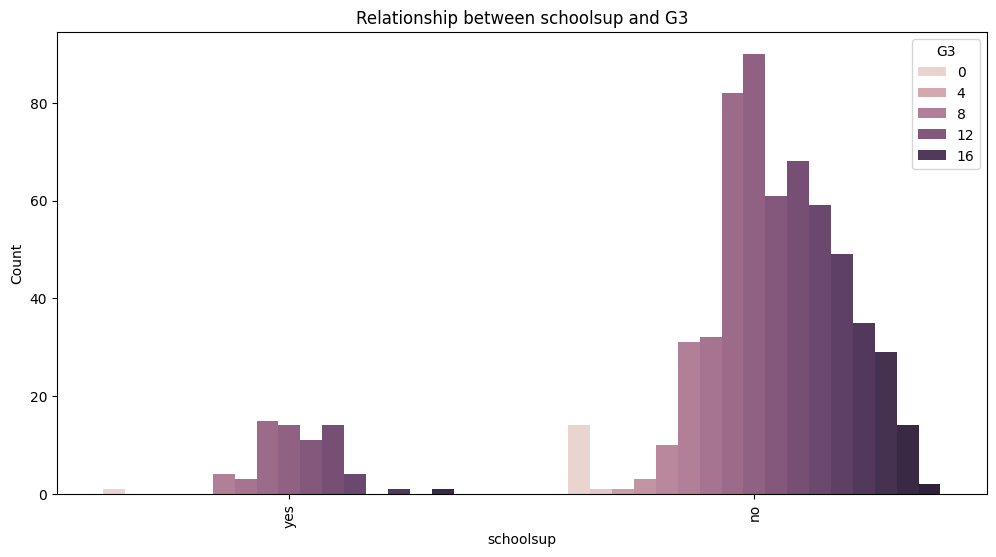

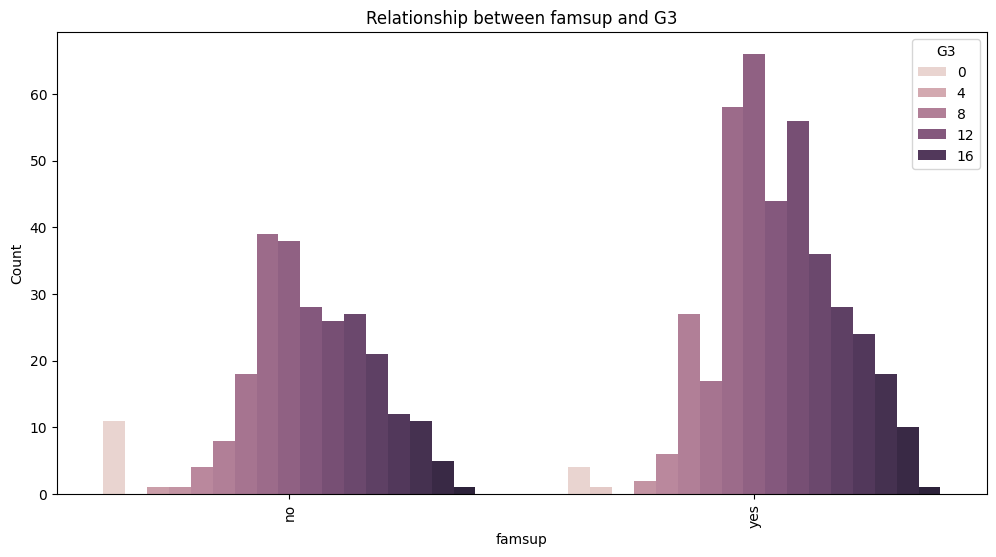

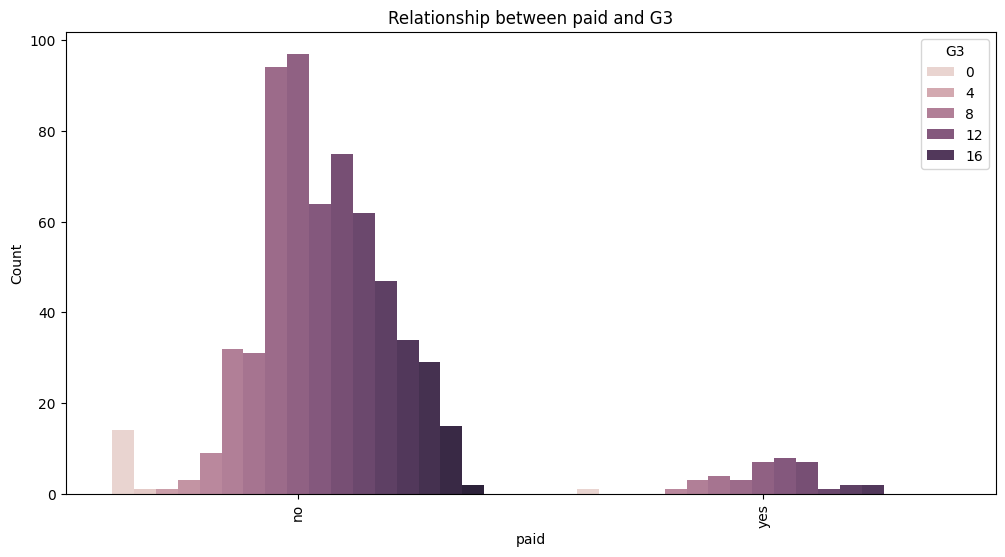

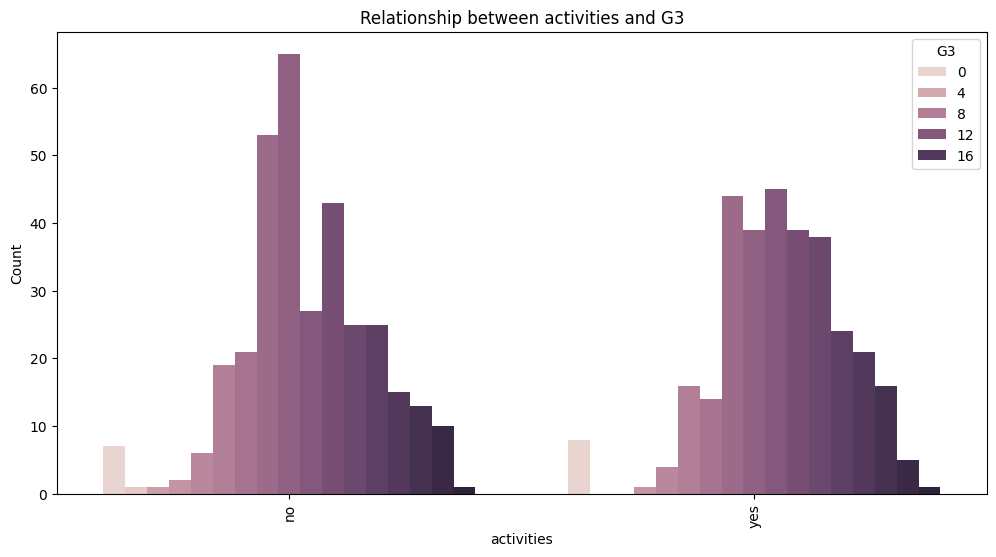

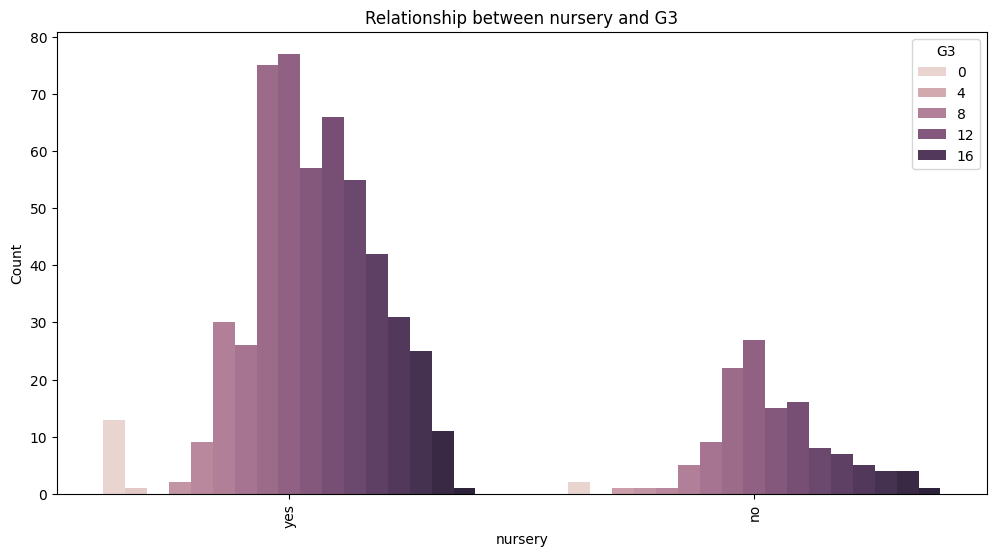

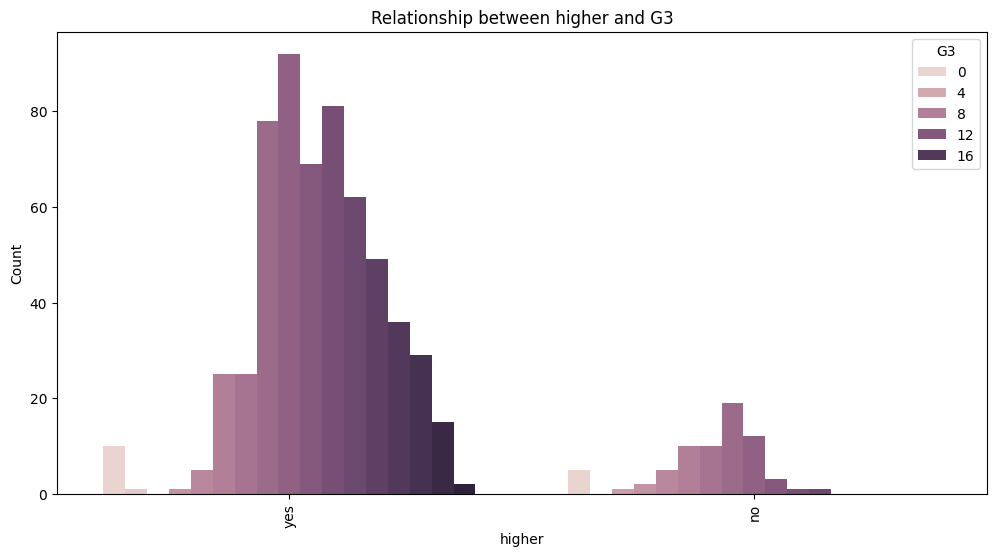

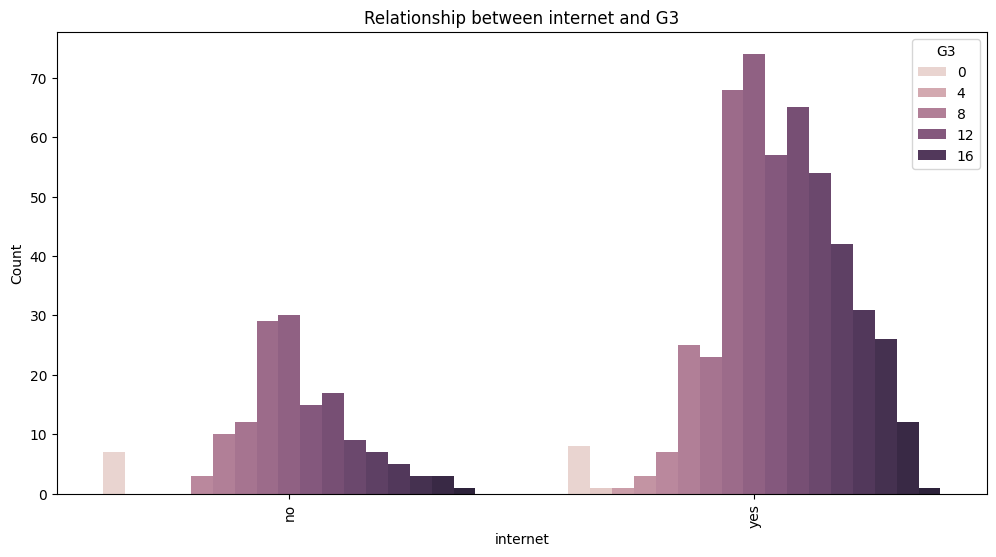

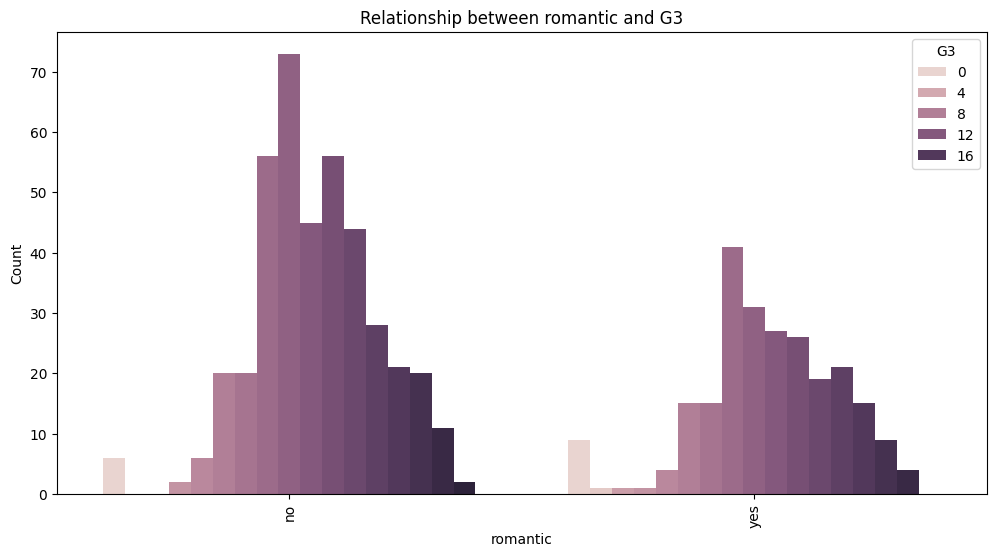

In [8]:
# Step 7: Examine target variable distributions and relationships with other features
print(f"\nDistribution of target variable ({target}):")
print(data[target].value_counts(normalize=True))

# Visualize target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[target].dropna(), kde=True)
plt.title(f'Distribution of {target}')
plt.xlabel(target)
plt.ylabel('Frequency')
plt.show()

# Relationship between target and other features
categorical_features = data.select_dtypes(include=[object]).columns.tolist()
for feature in categorical_features:
    if feature != target and data[feature].nunique() < 30:  # Limit to features with fewer unique categories
        plt.figure(figsize=(12, 6))
        sns.countplot(x=feature, hue=target, data=data)
        plt.title(f'Relationship between {feature} and {target}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()

The distribution of the target variable (G3) reveals:

Skewed Distribution: The grades are not uniformly distributed. The highest frequency is around grade 11, followed by grades 10 and 13. There are very few students with extreme grades (either very high or very low).
Multiple Peaks: The distribution shows multiple peaks, indicating the presence of several common grade levels among students.

In [9]:
# Step 8: Handling missing values and encoding categorical features

# Fill missing values in numerical columns with the mean of the column
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill missing values in categorical columns with the most frequent value
categorical_cols = data.select_dtypes(include=[object]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Convert categorical columns to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)


In [10]:
# Step 9: Correlation with the target variable
corr_with_target = data.corr()[target].sort_values(ascending=False)
print("Top 10 features positively correlated with target:")
print(corr_with_target.head(10))
print("\nTop 10 features negatively correlated with target:")
print(corr_with_target.tail(10))

Top 10 features positively correlated with target:
G3                   1.000000
G2                   0.918548
G1                   0.826387
higher_yes           0.332172
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
reason_reputation    0.170944
address_U            0.167637
internet_yes         0.150025
Name: G3, dtype: float64

Top 10 features negatively correlated with target:
health         -0.098851
age            -0.106505
freetime       -0.122705
traveltime     -0.127173
sex_M          -0.129077
reason_other   -0.132577
Walc           -0.176619
Dalc           -0.204719
school_MS      -0.284294
failures       -0.393316
Name: G3, dtype: float64


Takeaway:
The features most positively correlated with the target variable 'G3' are previous grades (G1, G2), higher education aspirations (higher_yes), study time, and parental education levels (Medu, Fedu). This indicates that previous academic performance and supportive educational environments contribute significantly to final grades. On the other hand, features like failures, attending a specific school (school_MS), and higher alcohol consumption (Dalc, Walc) negatively impact final grades, suggesting these factors detract from academic success.

In [11]:
# Step 10: Feature Importance Analysis
# Prepare data for modeling
X = data.drop(columns=[target])
y = data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 important features:")
print(feature_importance.head(10))

Top 10 important features:
G2           0.827115
absences     0.035854
G1           0.019740
age          0.008999
freetime     0.008060
Dalc         0.007257
Medu         0.007206
school_MS    0.006518
famrel       0.006308
goout        0.006013
dtype: float64


Takeaway:
The Random Forest model identifies G2 and absences as the most significant predictors of the final grade (G3). Previous academic performance (G1, G2) and absences play crucial roles, indicating that consistent attendance and steady performance are key factors for success. Additionally, age, free time, and alcohol consumption (Dalc) are notable, suggesting that personal habits and demographic factors also influence academic outcomes.

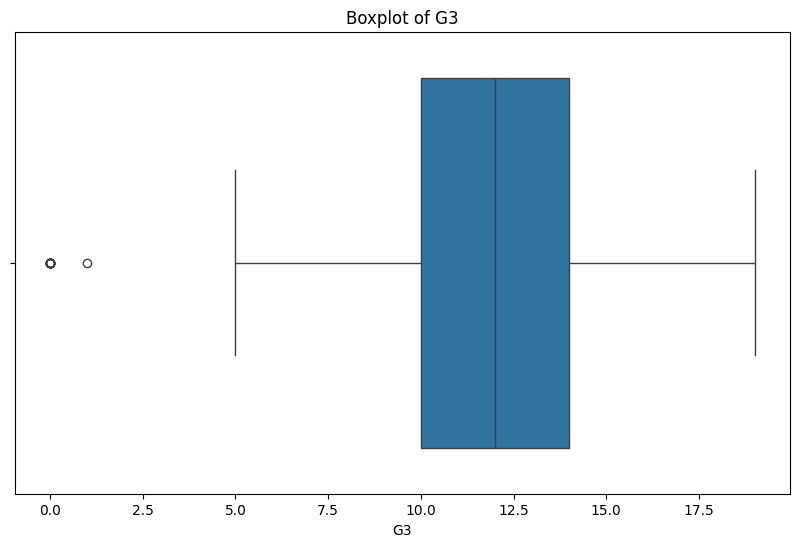

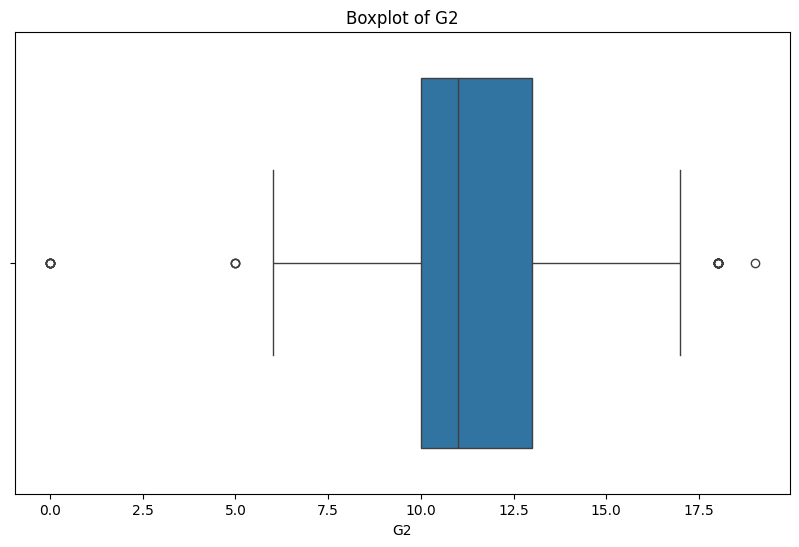

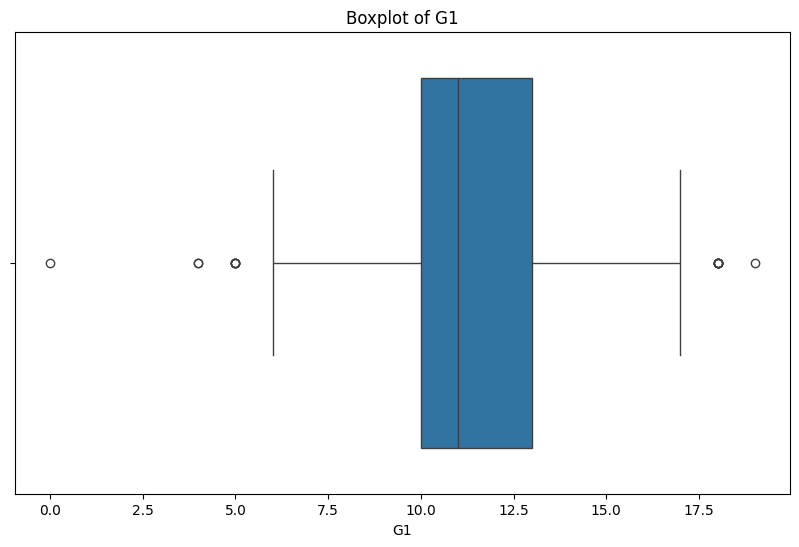

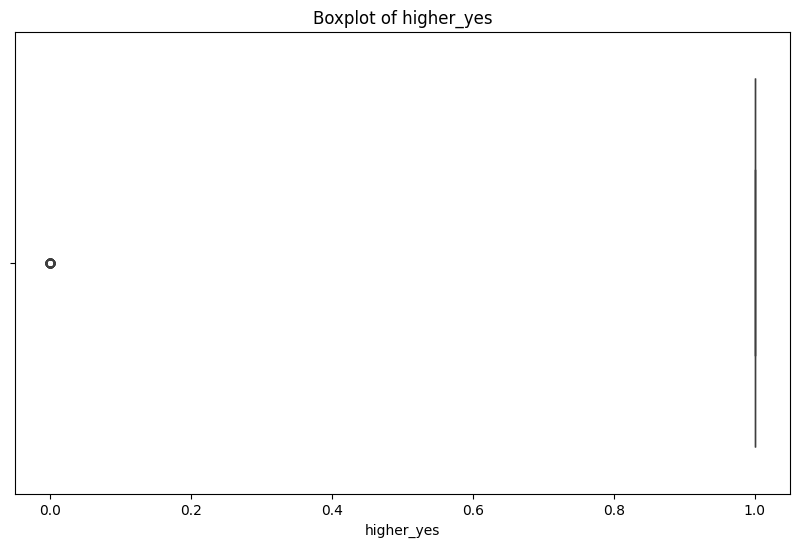

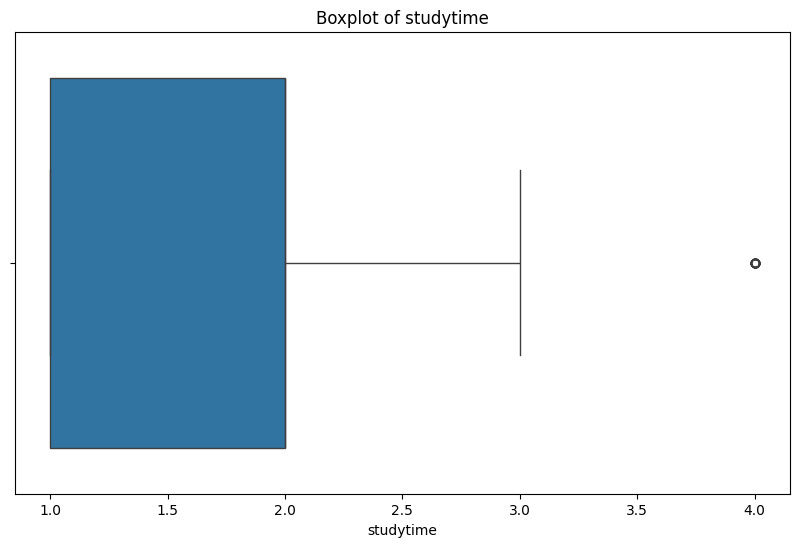

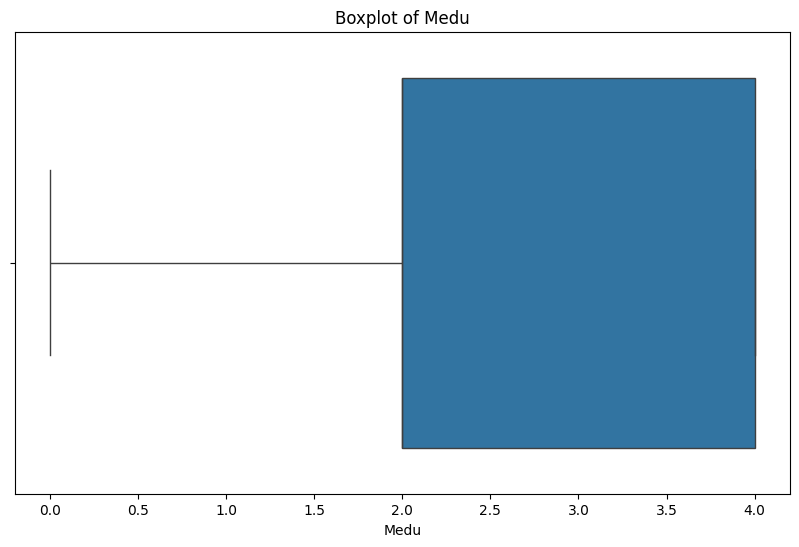

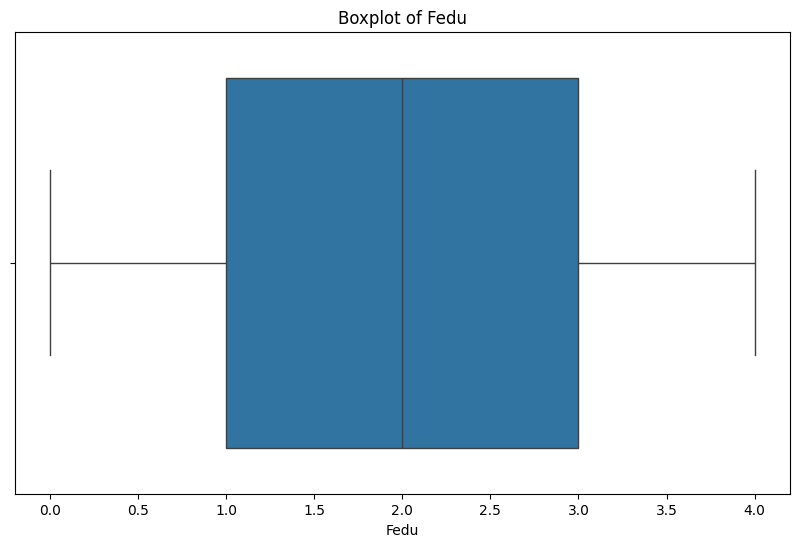

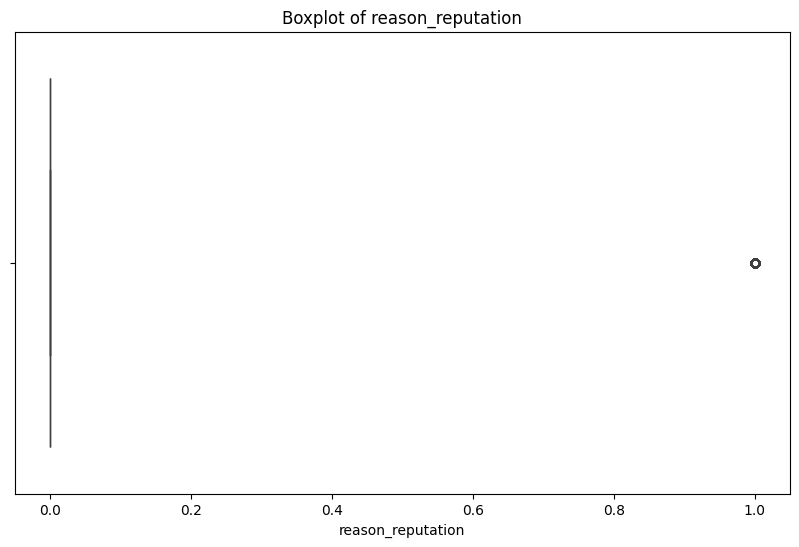

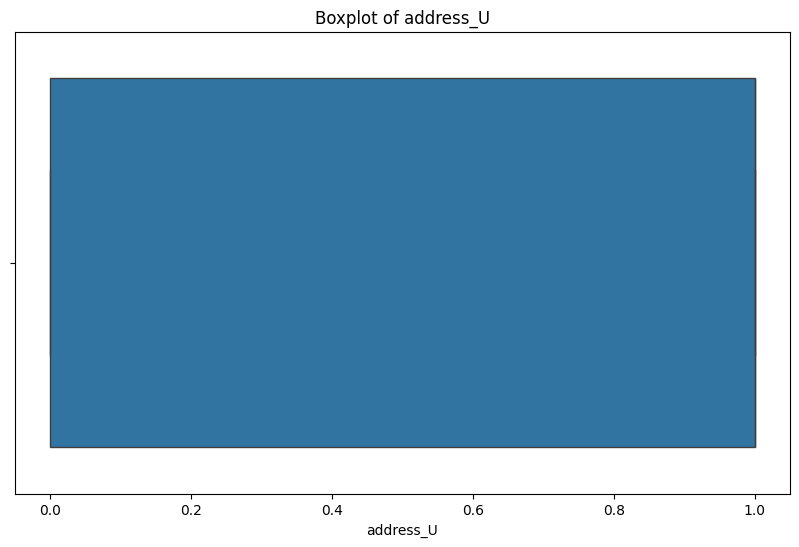

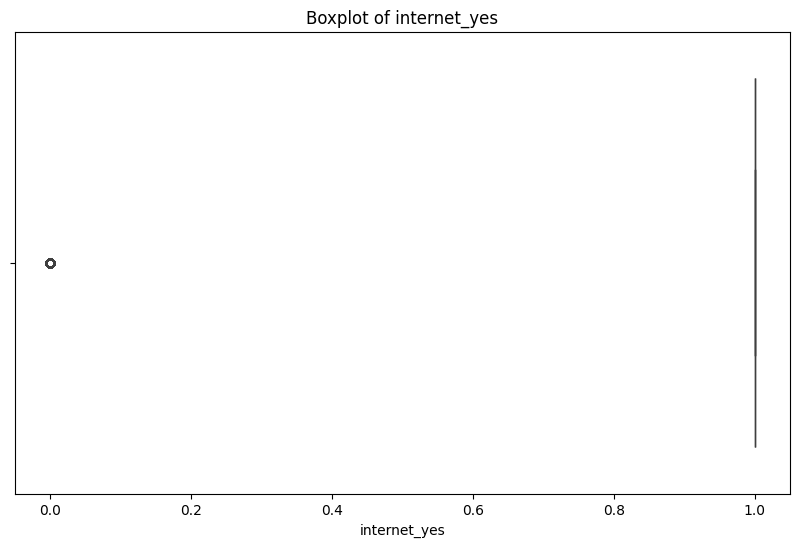

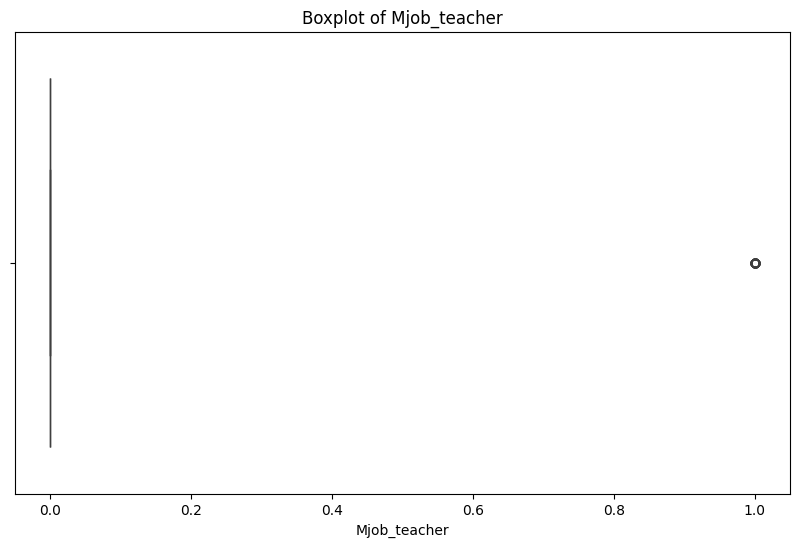

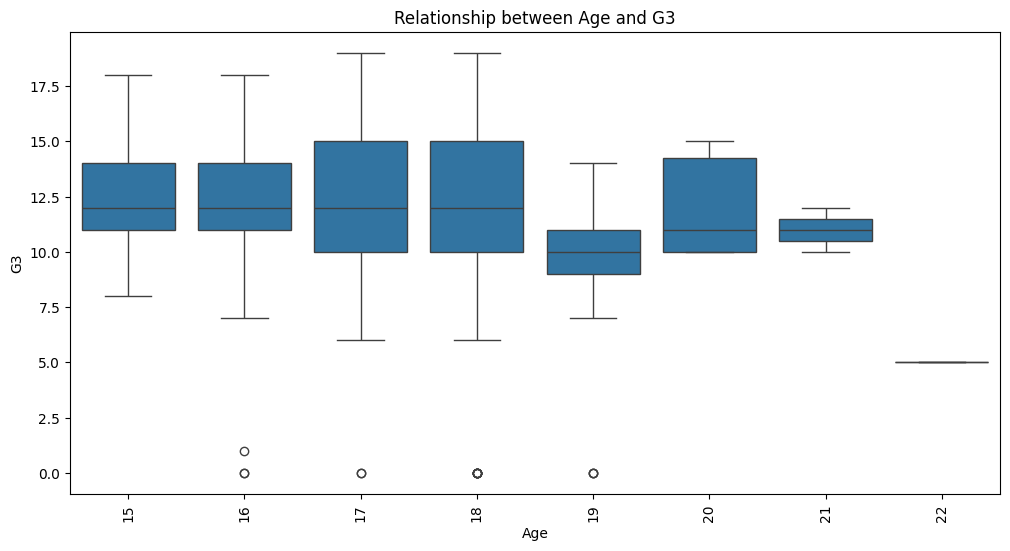

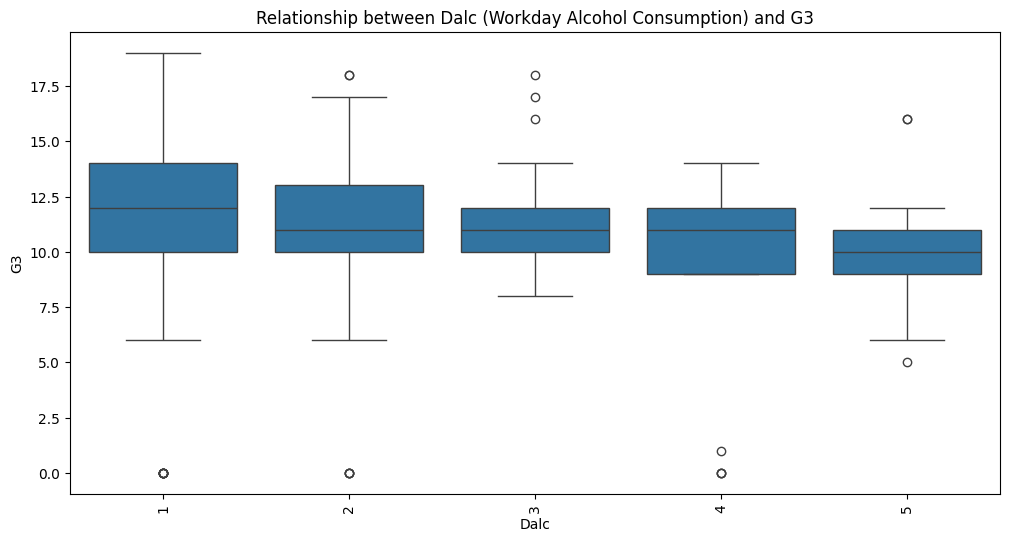

Data exploration complete.


In [12]:
# Step 11: Outlier Detection
# Boxplot for target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=data[target])
plt.title(f'Boxplot of {target}')
plt.show()

# Boxplots for top numerical features
top_numerical_features = corr_with_target.index[1:11]  # Excluding the target itself
for feature in top_numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Boxplot for categorical features
categorical_features = data.select_dtypes(include=['uint8']).columns.tolist()
for feature in categorical_features:
    if data[feature].nunique() < 30:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=feature, y=target, data=data)
        plt.title(f'Boxplot of {target} by {feature}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.xticks(rotation=90)
        plt.show()

# Additional Visualizations focusing on 'age' and 'Dalc'
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y=target, data=data)
plt.title(f'Relationship between Age and {target}')
plt.xlabel('Age')
plt.ylabel(target)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dalc', y=target, data=data)
plt.title(f'Relationship between Dalc (Workday Alcohol Consumption) and {target}')
plt.xlabel('Dalc')
plt.ylabel(target)
plt.xticks(rotation=90)
plt.show()

print("Data exploration complete.")

Correlation Matrix:
The correlation matrix shows that G3 is highly correlated with G1 and G2, reinforcing the importance of continuous academic performance. Other correlations, such as Medu and Fedu with grades, highlight the role of parental education.

Pairplot for Numerical Features:
The pairplot reveals distribution patterns and relationships among numerical features. It shows that higher parental education levels are associated with better student performance, and previous grades predict future performance.

Distribution of G3:
The distribution of G3 is slightly left-skewed, indicating that most students have grades clustered in the middle to high range (10-15). This suggests that the majority of students perform reasonably well.

Boxplots for G1, G2, and G3:
The boxplots show consistent grade distributions across the three periods, with most grades between 10 and 15. This indicates stable academic performance.

Relationship between Age and G3:
The boxplot shows that younger students (15-17 years) tend to have higher median grades compared to older students (18-22 years). This could indicate that younger students are performing better academically.

Relationship between Dalc (Workday Alcohol Consumption) and G3:
The boxplot suggests that higher levels of alcohol consumption during workdays are associated with lower grades, indicating a negative impact of alcohol on academic performance.

Takeaway:
The visualizations reinforce the quantitative findings, showing that previous grades, parental education, and personal habits significantly influence final grades. Interventions targeting consistent performance, reduced absenteeism, and healthier habits could improve academic outcomes.

In [13]:
# Save the cleaned dataset for further analysis
data.to_csv('cleaned_student_data_uncleaned.csv', index=False)
print("done")

done
